In [88]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [89]:
df=pd.read_csv("data.csv", encoding='latin-1', sep=";")
# data=df.iloc[:, [0,2151260832 % 16 + 1, 2151260832 % 16 +2, 2151260832 % 16 +3]]
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [90]:
data=df.iloc[:, [1,2,3]]
data.head()

,1,2,3
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.0,1002.0
4,1061.5,1061.5,1061.5


In [91]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)

Start probabilities:  [4.75686255e-10 1.00000000e+00]
Transition matrix:  [[9.25214697e-15 1.00000000e+00]
 [2.24759624e-02 9.77524038e-01]]
Means:  [[ 966.037595    966.11258178  966.037595  ]
 [1041.89189429 1041.89189429 1041.89189429]]
Covariances:  [[[1.42595303e+00 1.40688677e+00 1.42470325e+00]
  [1.40688677e+00 1.39219573e+00 1.40813655e+00]
  [1.42470325e+00 1.40813655e+00 1.42595303e+00]]

 [[1.11465070e+04 1.11465070e+04 1.11465070e+04]
  [1.11465070e+04 1.11465070e+04 1.11465070e+04]
  [1.11465070e+04 1.11465070e+04 1.11465070e+04]]]


In [92]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
Sampled observations:  [[1262.92638312 1262.92638213 1262.92638213]
 [1241.57143446 1241.57143318 1241.57143318]
 [1018.60924444 1018.60924327 1018.60924327]
 [1012.74588406 1012.74588276 1012.74588276]
 [ 818.55143984  818.55143908  818.55143

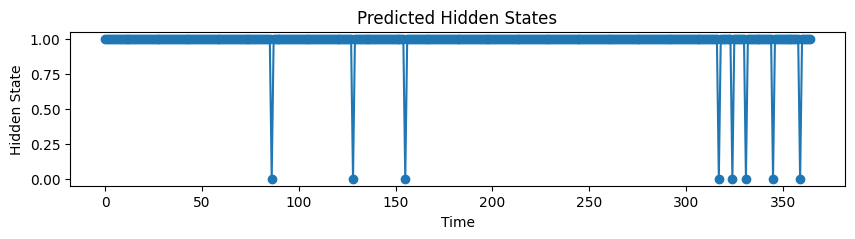

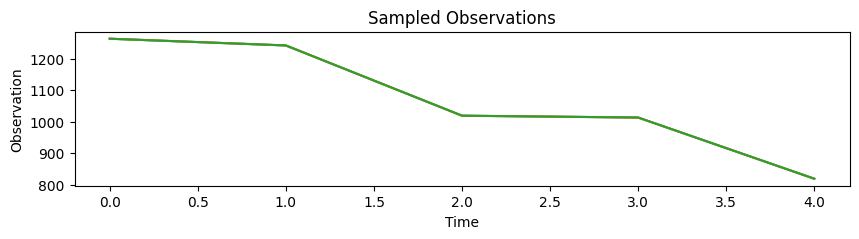

In [93]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")

In [94]:
# Chuẩn hóa ma trận chuyển tiếp
def normalize_transition_matrix(transition_matrix):
    return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Định nghĩa hàm markov_chain
def markov_chain(transmat, state, state_names, samples):
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0, rows))

    # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
    for r in range(rows): 
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    states = [] 
    for n in range(samples): 
        state = rvs[state].rvs(size=1)[0]    
        states.append(state_names[state])
    return states

def compute_transition_matrix(data):
    weather_states = []
    for column in data.columns[1:]:
        for i in range(len(data[column])-1):
            if data[column][i] < data[column][i+1]:
                weather_states.append('S')  # Nắng
            else:
                weather_states.append('C')  # Mây

    transition_counts = {'S': {'S': 0, 'C': 0}, 'C': {'S': 0, 'C': 0}}
    for i in range(len(weather_states)-1):
        from_state = weather_states[i]
        to_state = weather_states[i+1]
        transition_counts[from_state][to_state] += 1

    transition_matrix = np.zeros((2, 2))
    for i, from_state in enumerate(['S', 'C']):
        for j, to_state in enumerate(['S', 'C']):
            transition_matrix[i, j] = transition_counts[from_state][to_state] / weather_states.count(from_state)

    return transition_matrix

# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
transmat = compute_transition_matrix(data)
transmat = normalize_transition_matrix(transmat)  # Chuẩn hóa ma trận chuyển tiếp

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)


['C', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'S', 'C', 'C', 'S', 'S', 'S',

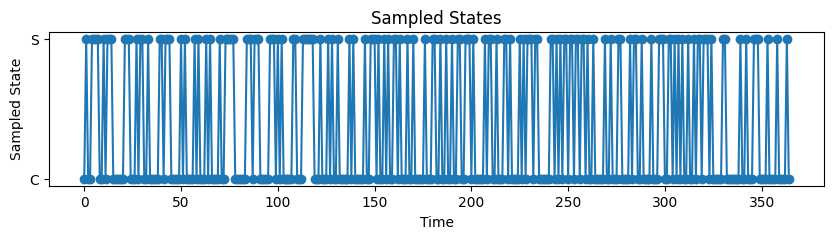

In [95]:
# Hàm vẽ biểu đồ cho dữ liệu mẫu dự đoán
def plot_samples(samples, title):
    plt.figure(figsize=(10, 2))
    plt.plot(samples, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Sampled State")
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_samples(samples, "Sampled States")

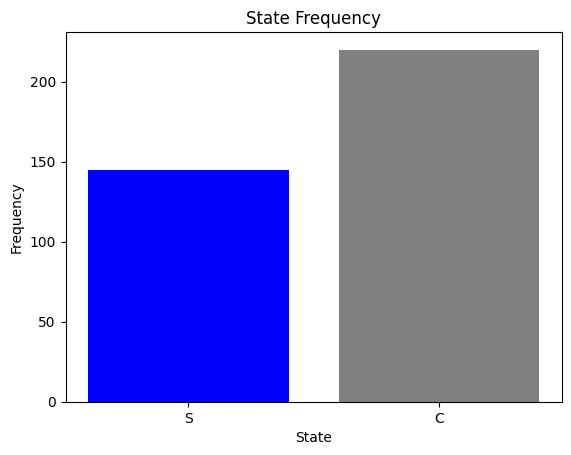

In [96]:
# Hàm vẽ biểu đồ cho dữ liệu samples
def plot_samples(samples):
    # Đếm số lần xuất hiện của mỗi trạng thái
    counts = {'S': 0, 'C': 0}
    for sample in samples:
        counts[sample] += 1

    # Vẽ biểu đồ cột
    plt.bar(counts.keys(), counts.values(), color=['blue', 'grey'])
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title('State Frequency')
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_samples(samples)

In [97]:
data=df.iloc[:, [0,1,2,3]]
data.head()

,Ngày,1,2,3
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0
4,01/05/2021,1061.5,1061.5,1061.5


In [98]:
# Chuyển đổi cột ngày tháng năm thành kiểu dữ liệu datetime
data['Ngày']= pd.to_datetime(data['Ngày'], format='%d/%m/%Y')

# Tách cột ngày tháng năm thành các cột riêng lẻ
data['ngay'] = data['Ngày'].dt.day
data['thang'] = data['Ngày'].dt.month
data['nam'] = data['Ngày'].dt.year

# Hiển thị DataFrame kết quả
print(data)

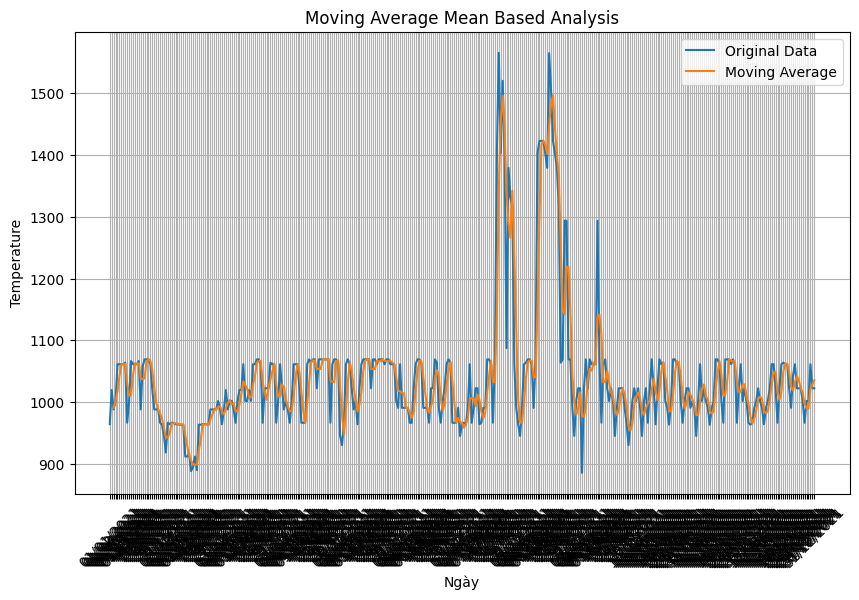

In [99]:
# Chọn cột dữ liệu để phân tích
column_name = '1'
# Áp dụng moving average
window_size = 3  # Kích thước cửa sổ moving average
data['moving_average'] = data[column_name].rolling(window=window_size).mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data['Ngày'], data[column_name], label='Original Data')
plt.plot(data['Ngày'], data['moving_average'], label='Moving Average')
plt.xlabel('Ngày')
plt.ylabel('Temperature')
plt.title('Moving Average Mean Based Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()